# Name: Aishwarya Khairnar

# Task 1: IRIS FLOWER CLASSIFICATION

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [483]:
data = pd.read_csv("iris.csv")

In [484]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [485]:
data.shape

(150, 6)

In [486]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [487]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [488]:
data = data.drop(columns='Id')

In [489]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [490]:
data = data.rename(columns={'SepalLengthCm':'Sepal_length',
                     'SepalWidthCm':'Sepal_width',
                     'PetalLengthCm':'Petal_length',
                     'PetalWidthCm':'Petal_width'})

In [491]:
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualizing species based on Sepal length and width

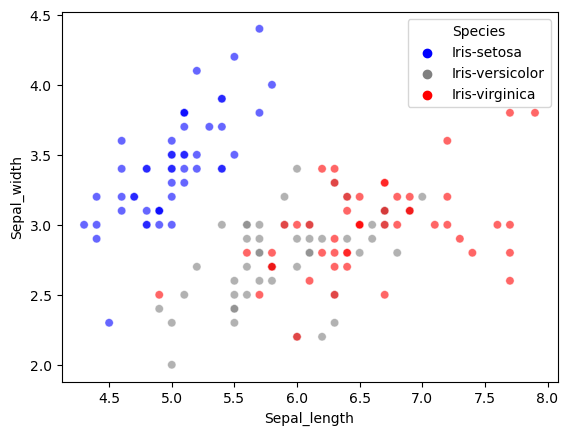

In [492]:
sns.scatterplot(data, x="Sepal_length", y="Sepal_width", hue="Species", palette=colors, alpha=0.6, zorder=3)
plt.show()

# Visualizing species based on petal length and width

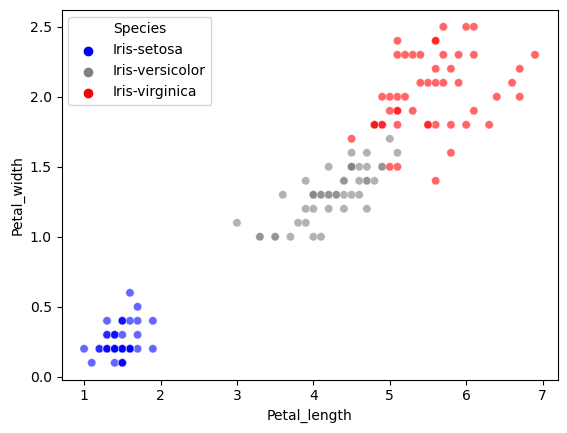

In [493]:
sns.scatterplot(data, x="Petal_length", y="Petal_width", hue="Species", palette=colors, alpha=0.6, zorder=3)
plt.show()

In [494]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [495]:
dic = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

In [496]:
data.Species.replace(dic,inplace=True)

In [497]:
data.head(2)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [498]:
data.dtypes

Sepal_length    float64
Sepal_width     float64
Petal_length    float64
Petal_width     float64
Species           int64
dtype: object

In [499]:
data.corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
Sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


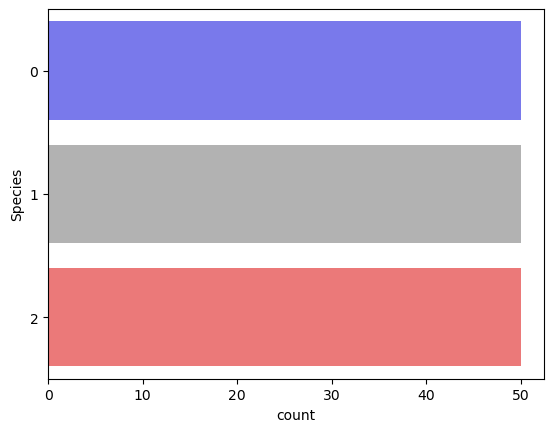

In [500]:
sns.countplot(data, y='Species', palette=colors, alpha=0.6)
plt.show()

# Values distribution based on petal width

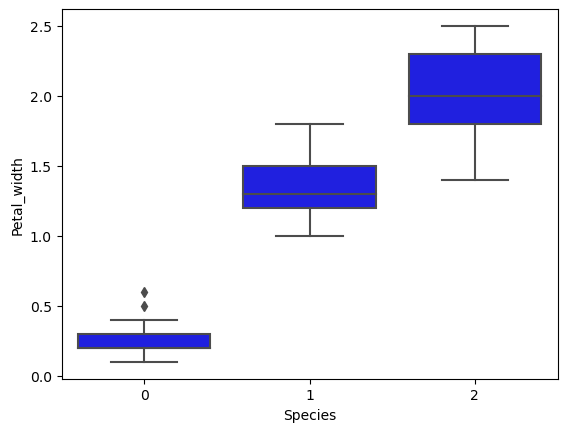

In [501]:
sns.boxplot(x="Species", y="Petal_width", data=data, color=colors[0])
plt.show()

# Values distribution based on petal length

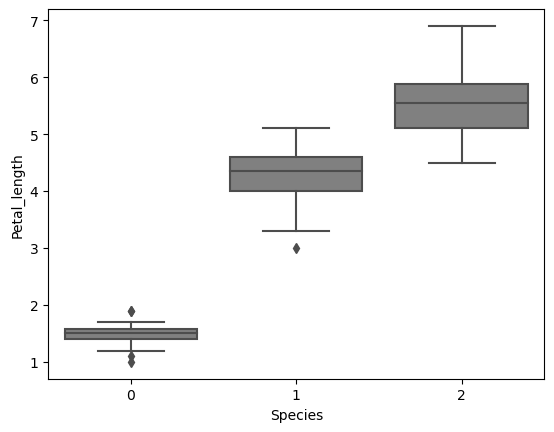

In [502]:
sns.boxplot(x="Species", y="Petal_length", data=data, color=colors[1])
plt.show()

# Values distribution based on sepal length

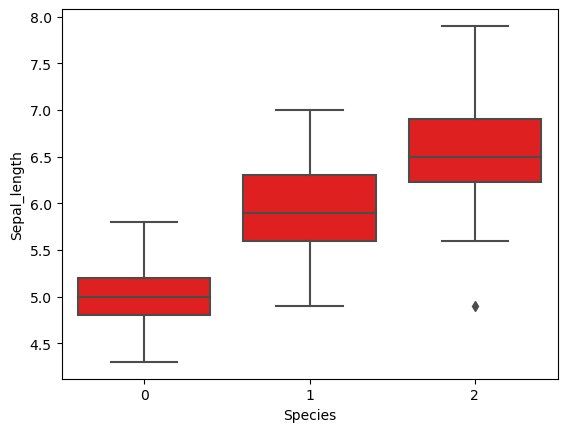

In [503]:
sns.boxplot(x="Species", y="Sepal_length", data=data, color=colors[2])
plt.show()

# Values distribution based on sepal width

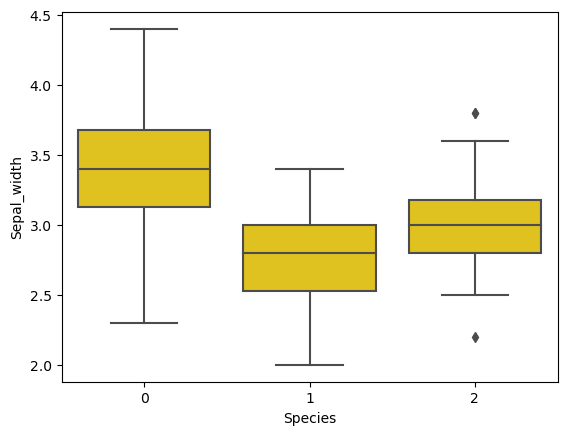

In [504]:
sns.boxplot(x="Species", y="Sepal_width", data=data, color='gold')
plt.show()

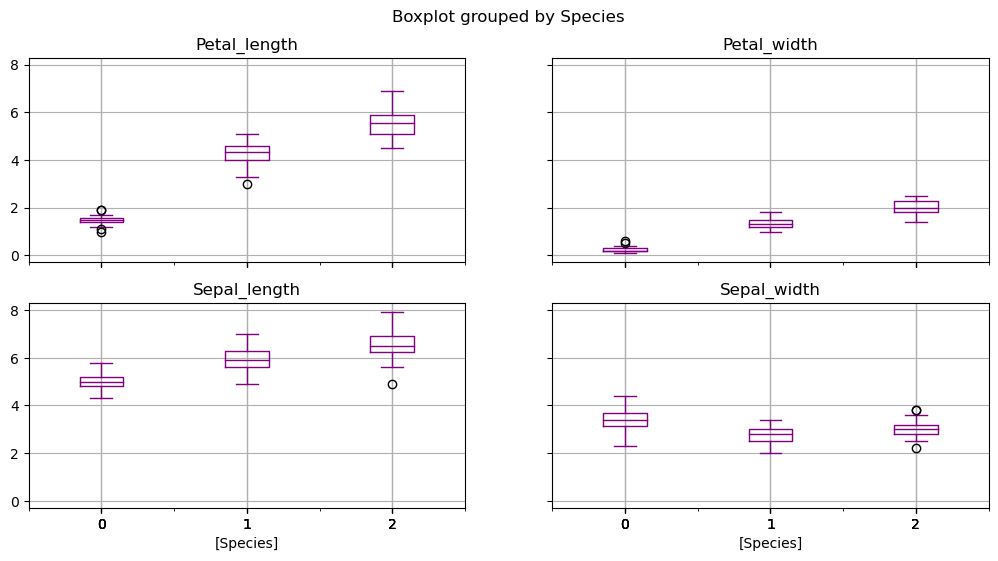

In [505]:
data.boxplot(by="Species", figsize=(12, 6), color='purple')
plt.show()

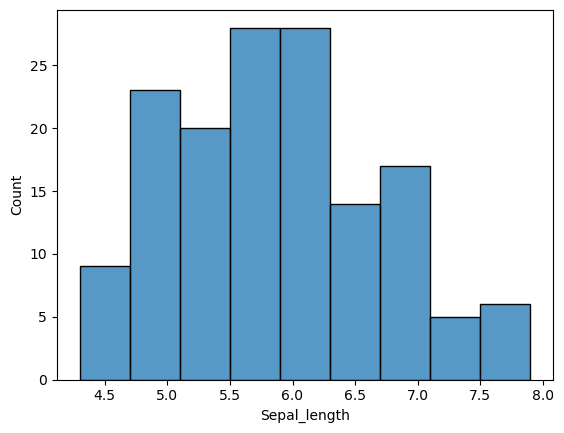

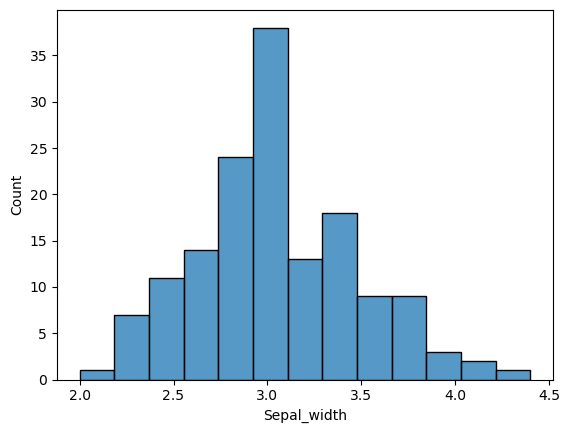

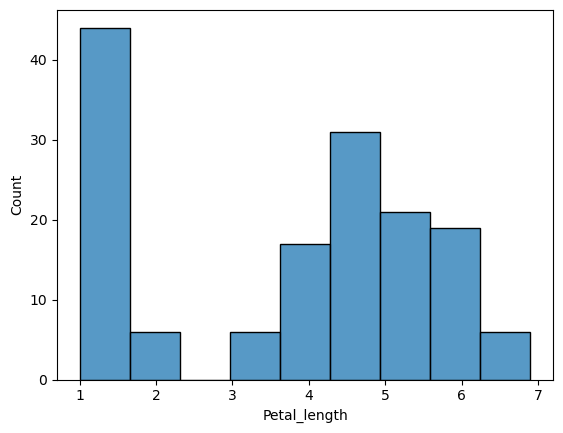

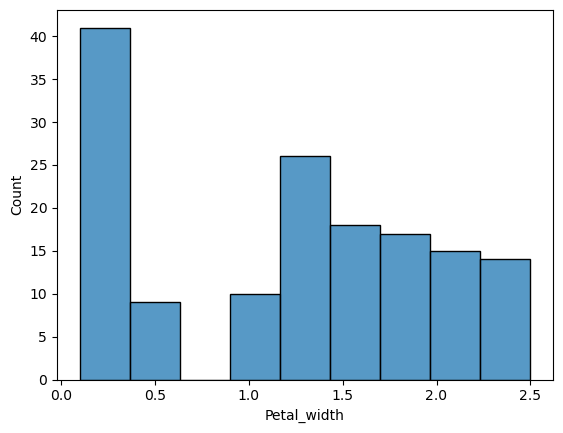

In [506]:
for feature in data.columns[0:-1]:
    sns.histplot(data, x=feature, bins="auto")
    plt.xlabel(feature)
    plt.show()

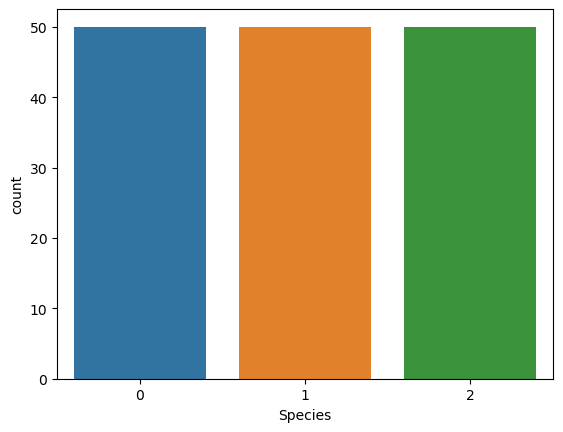

In [507]:
sns.countplot(data,x=data.Species)
plt.show()

# Linear regression based on sepal

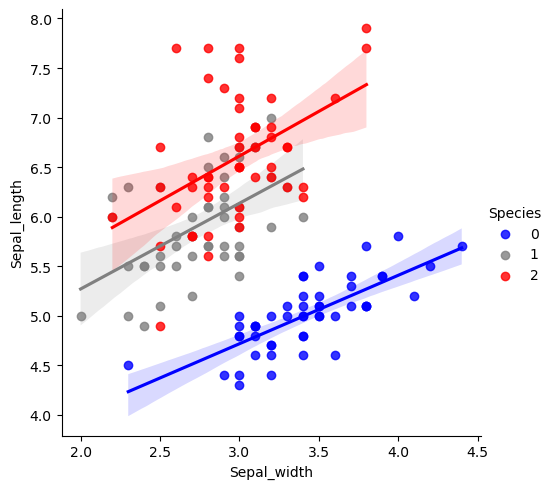

In [508]:
sns.lmplot(x="Sepal_width", y="Sepal_length", hue="Species", data=data, palette=colors)
plt.show()

# Linear regression based on petal

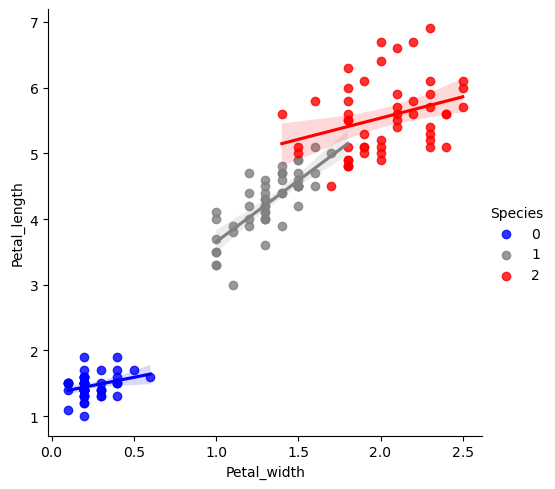

In [509]:
sns.lmplot(x="Petal_width", y="Petal_length", hue="Species", data=data, palette=colors)
plt.show()

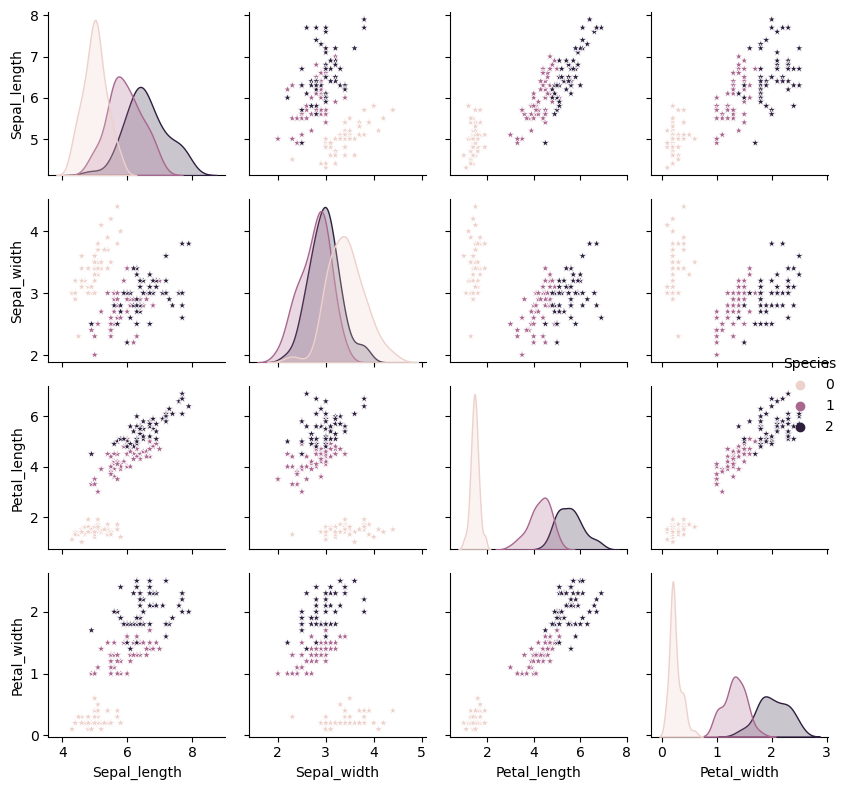

In [510]:
sns.pairplot(data,hue='Species',size=2, markers="*",diag_kind="auto")
plt.tight_layout()
plt.show()

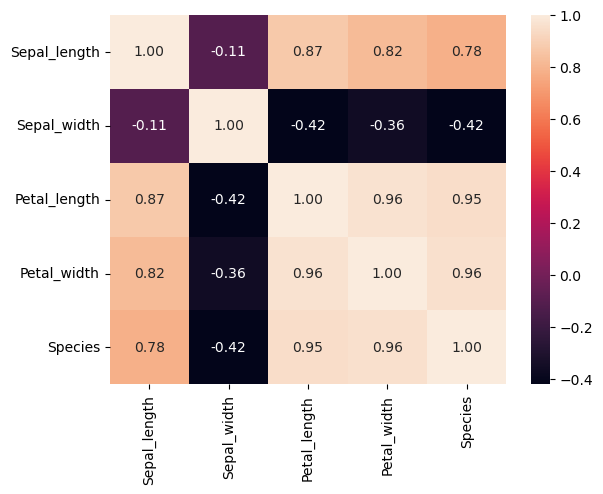

In [511]:
sns.heatmap(data.corr(numeric_only=True), fmt=".2f", annot=True)
plt.show()

According to the heatmap, the remarkable strong positive correlation appears between SepalLength and PetalLength- PetalWidth, as well as the surprising no positive correlation between SepalLength and SepalWidth, and finally the strongest positive correlation appears between PetalWidth and PetalLength.

In [514]:
# store the feature matrix (X) and response vector (y)
X = data.drop(columns = 'Species')
y = data['Species']

In [515]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [560]:
y.to_frame()

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [561]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [562]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# 1. KNN

In [563]:
# training the model on training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [564]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [565]:
# making predictions on the testing set
knn_y_pred = knn.predict(X_test)
knn_y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [567]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn.metrics import confusion_matrix,classification_report,r2_score
knn_r2 = r2_score(y_test,knn_y_pred)*100
print("K-Nearest Neighbors model accuracy:",knn_r2)

print("------------------------------------")

knn_cm = confusion_matrix(y_test,knn_y_pred)
print("Confusion matrix of KNN:\n", knn_cm)

print("------------------------------------")

print(classification_report(y_test,knn_y_pred))

K-Nearest Neighbors model accuracy: 100.0
------------------------------------
Confusion matrix of KNN:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 2. SVM

In [568]:
# training the model on training set
from sklearn.svm import SVC
svc = SVC()

In [569]:
svc.fit(X_train,y_train)

SVC()

In [570]:
svc_y_pred = svc.predict(X_test)
svc_y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [572]:
# comparing actual response values (y_test) with predicted response values (y_pred)
svc_r2 = r2_score(y_test,svc_y_pred)*100
print("SVM model accuracy:",svc_r2)

print("------------------------------------")

svc_cm = confusion_matrix(y_test,svc_y_pred)
print("Confusion matrix of SVM:\n", svc_cm)

print("------------------------------------")

print(classification_report(y_test,svc_y_pred))

SVM model accuracy: 100.0
------------------------------------
Confusion matrix of SVM:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 3. Decision Tree

In [573]:
# training the model on training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [574]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [575]:
dt_y_pred = dt.predict(X_test)
dt_y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [576]:
# comparing actual response values (y_test) with predicted response values (y_pred)

dt_r2 = r2_score(y_test,dt_y_pred)*100
print("Decision Tree Model accuracy:",dt_r2)

print("------------------------------------")

dt_cm = confusion_matrix(y_test,dt_y_pred)
print("Confusion matrix of Decision Tree:\n", dt_cm)

print("------------------------------------")

print(classification_report(y_test,dt_y_pred))

Decision Tree Model accuracy: 100.0
------------------------------------
Confusion matrix of Decision Tree:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 4. Random Forest

In [577]:
# training the model on training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [578]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [579]:
rf_y_pred = rf.predict(X_test)
rf_y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [580]:
# comparing actual response values (y_test) with predicted response values (y_pred)
rf_r2 = r2_score(y_test,rf_y_pred)*100
print("Random Forest model accuracy:",rf_r2)

print("------------------------------------")

rf_cm = confusion_matrix(y_test,rf_y_pred)
print("Confusion matrix of Random Forest:\n", rf_cm)

print("------------------------------------")

print(classification_report(y_test,rf_y_pred))

Random Forest model accuracy: 100.0
------------------------------------
Confusion matrix of Random Forest:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 5.Naive Bayes

In [581]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [582]:
nb.fit(X_train,y_train)

GaussianNB()

In [583]:
nb_y_pred = nb.predict(X_test)
nb_y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [584]:
# comparing actual response values (y_test) with predicted response values (y_pred)
nb_r2 = r2_score(y_test,nb_y_pred)*100
print("Accuracy of Naive Bayes:" ,nb_r2)

print("------------------------------------")

nb_cm = confusion_matrix(y_test,nb_y_pred)
print("Confusion matrix of Random Forest:\n", nb_cm)

print("------------------------------------")

print(classification_report(y_test,nb_y_pred))

Accuracy of Naive Bayes: 93.81443298969072
------------------------------------
Confusion matrix of Random Forest:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

